Generalmente, una buena práctica es en la primer celda (si están usando jupyter notebook) o en las primeras líneas (si están armando un script .py) se definen todas las librerías y las configuraciones para luego comenzar con los códigos.
Para importar una librería se debe utilizar la palabra reservada **import** seguido de la librería que se desea importar. En algunos casos se utilizan alias como se verá constantemente en la bibliografía acerca de pandas y numpy. 

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import os
os.chdir('../')
os.getcwd()
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns 
sns.set()
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder


In [2]:
train = pd.read_csv("./data/titanic/01 - inicial/train.csv")
test = pd.read_csv("./data/titanic/01 - inicial/test.csv")

In [3]:
data = train.append(test, ignore_index=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


# Diccionario de los campos de la base
**Survived** -> Survival - target (0 = No, 1 = Si)\
**Pclass** -> Ticket Class (1 = 1st, 2 = 2nd, 3 = 3rd)\
**Sex** -> Sex (male, female)\
**Age** -> Age in years\
**SibSp** -> of siblings / spouses aboard the Titanic\
**Parch** -> of parents / children aboard the Titanic\
**Ticket** -> ticket number\
**Fare** -> Passenger Fare (Tarifa)\
**Cabin** -> cabin Number\
**Embarked** -> Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)


In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.shape

(1309, 12)

In [7]:
#Validamos la cantidad de nulos por variable
data.isna().sum().sort_values(ascending = False)

Cabin          1014
Survived        418
Age             263
Embarked          2
Fare              1
Ticket            0
Parch             0
SibSp             0
Sex               0
Name              0
Pclass            0
PassengerId       0
dtype: int64

In [8]:
(data.isna().sum() / data.shape[0]).sort_values(ascending = False)

Cabin          0.774637
Survived       0.319328
Age            0.200917
Embarked       0.001528
Fare           0.000764
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
PassengerId    0.000000
dtype: float64

In [9]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


En la celda anterior podemos observar que la variable Cabin posee más del 77% de la base con valores nulos o missings. Por ende es una variable candidata a ser removida. La segunda variable que debe tener un tratamiento de missings es la variable Age. Por ende vamos a realizar algunos estudios para encontrar la mejor manera de completar dicha variable

In [10]:
#Voy a calcular la media por Genero
data[~data.Age.isna()].groupby("Sex").Age.mean()

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

In [11]:
#Abro la media de edad por clase
data[~data.Age.isna()].groupby("Pclass").Age.mean()

Pclass
1    39.159930
2    29.506705
3    24.816367
Name: Age, dtype: float64

In [12]:
#Abro la media de edad por clase y edad
data[~data.Age.isna()].groupby(["Pclass", "Sex"]).Age.mean()

Pclass  Sex   
1       female    37.037594
        male      41.029272
2       female    27.499223
        male      30.815380
3       female    22.185329
        male      25.962264
Name: Age, dtype: float64

Simplemente abriendo la edad por clase y sexo podemos encontrar que existen diferencias en las edades entre las clases y el género. Es lógico pensando en la época en la que el Titanic se hundió.
Por tal motivo si queremos realizar algún tipo de imputación, ya que tener en cuenta como mínimo estas dos variables. Por ende hacemos una imputación de la variable Age utilizando la mediana por estos seis segmentos (Clase y Sexo)

In [13]:
for sex in data.Sex.drop_duplicates().values:
    for pClass in data.Pclass.drop_duplicates().values:
        median = data[(~data.Age.isna()) & 
                       (data.Pclass == pClass) &
                       (data.Sex == sex)
                      ].Age.median()
        data["Age"] = np.where((data.Age.isna()) & 
                       (data.Pclass == pClass) &
                       (data.Sex == sex), median, data.Age)

In [14]:
data.Age.isna().sum()

0

La variable *Embarked* tiene solo dos casos en nulos. Una forma de imputar estos dos nulos es utilizar la categoría que más valores posea

In [15]:
data.groupby("Embarked").size().sort_values(ascending = False)

Embarked
S    914
C    270
Q    123
dtype: int64

In [16]:
#Imputamos los valores missings con la categoria S
data["Embarked"] = np.where(data.Embarked.isna(), "S", data.Embarked)

In [17]:
data.isna().sum().sort_values(ascending = False)

Cabin          1014
Survived        418
Fare              1
Embarked          0
Ticket            0
Parch             0
SibSp             0
Age               0
Sex               0
Name              0
Pclass            0
PassengerId       0
dtype: int64

La única variable que queda con valores nulos es Cabin, como la misma tenía un 77 % de nulos, la vamos a eliminar

In [18]:
data = data.drop(columns = ["Cabin"])

In [19]:
#El caso que falta imputar de la variable Fare (Tarifa) es de clase 3, por ende para imputar lo que 
#haremos es asignarle el valor mas alto del pasaje de tercera clase
data[data.Fare.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [20]:
fare = data[(~data.Fare.isna()) & (data.Pclass == 3)].Fare.max()
data["Fare"] = np.where(data.Fare.isna(), fare, data.Fare)
data.isna().sum().sort_values(ascending = False)

Survived       418
Embarked         0
Fare             0
Ticket           0
Parch            0
SibSp            0
Age              0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

<AxesSubplot:>

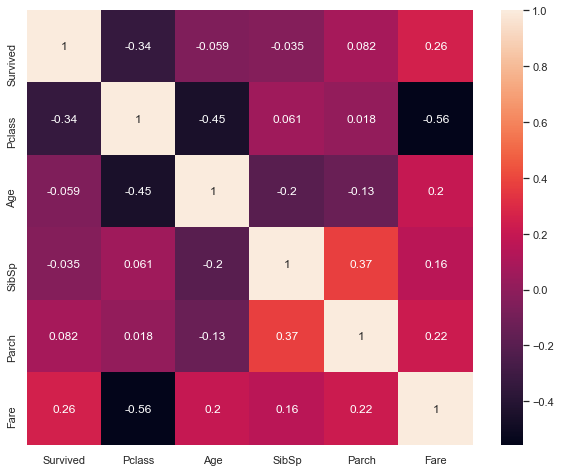

In [21]:
# Defining plot sizes
plt.figure(figsize = (10, 8))

# Creating correlation matrix
corr_mat = data.drop(columns=["PassengerId"]).corr()

# Plotting the matrix
sns.heatmap(corr_mat, xticklabels = corr_mat.columns, yticklabels = corr_mat.columns, annot=True)

Comenzaremos con los análisis visuales. Primero analizaremos la variable Embarked

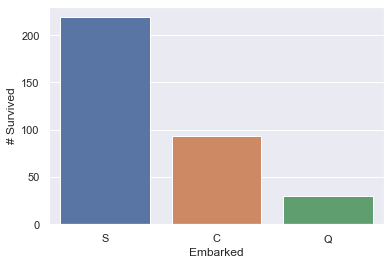

In [22]:
suma = data[~data.Survived.isna()].groupby("Embarked").Survived.sum()\
                                .to_frame("# Survived").reset_index()\
                                .sort_values(by = "# Survived", ascending = False)
chart = sns.barplot(x="Embarked", y="# Survived", 
                    data=suma)


Podemos observar que hay más personas que se salvan embarcadas en el puerto de Southampton, no obstante es realmente representativo?

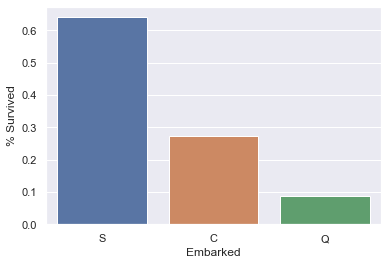

In [23]:
suma = data[~data.Survived.isna()].groupby("Embarked").Survived.sum()\
                                .to_frame("# Survived").reset_index()\
                                .sort_values(by = "# Survived", ascending = False)
suma ["% Survived"] = suma["# Survived"] / data.Survived.sum()
chart = sns.barplot(x="Embarked", y="% Survived", 
                    data=suma)


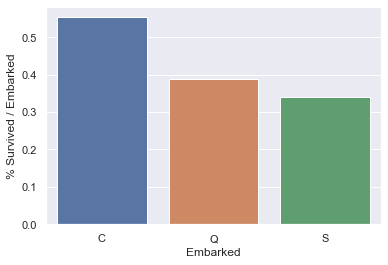

In [24]:
suma = data[~data.Survived.isna()].groupby("Embarked").size().to_frame("# People").join(
            data[~data.Survived.isna()].groupby("Embarked").Survived.sum().to_frame("# Survived"))
suma["% Survived / Embarked"] = suma["# Survived"] / suma["# People"]
suma = suma.reset_index()
chart = sns.barplot(x="Embarked", y="% Survived / Embarked", 
                    data=suma)


En el último gráfico podemos observar que finalmente la gente que se embarcó en el puerto de Cherbourg tuvo más chance de sobrevivir. Más del 50% de los embarcados en dicho puerto sobrevivieron.

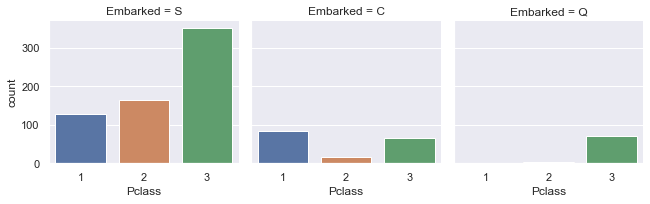

In [25]:
sns.factorplot('Pclass',col='Embarked',data=train,kind='count',size=3)

Para poder entender por que el puerto de Cherbourg tuvo mas personas salvadas abrimos por clase y puerto y observamos que en dicho puerto subio mucha mas gente de primera clase que del resto de las clases

Vamos a crear algunas variables, por ejemplo utilizando el nombre de las personas, sacaremos el título que tiene cada uno de ellos

In [26]:
data['titulo']=data['Name'].map(lambda x:x.split(',')[1].split('.')[0].strip())
#check the distribution of "title"
data['titulo'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Mlle              2
Ms                2
Major             2
Capt              1
the Countess      1
Jonkheer          1
Mme               1
Lady              1
Dona              1
Don               1
Sir               1
Name: titulo, dtype: int64

In [27]:
#Vamos a unificar algunos titulos de las personas
tituloDict={}
tituloDict['Mr']='Mr'
tituloDict['Mlle']='Miss'
tituloDict['Miss']='Miss'
tituloDict['Master']='Master'
tituloDict['Jonkheer']='Master'
tituloDict['Mme']='Mrs'
tituloDict['Ms']='Mrs'
tituloDict['Mrs']='Mrs'
tituloDict['Don']='Royalty'
tituloDict['Sir']='Royalty'
tituloDict['the Countess']='Royalty'
tituloDict['Dona']='Royalty'
tituloDict['Lady']='Royalty'
tituloDict['Capt']='Officer'
tituloDict['Col']='Officer'
tituloDict['Major']='Officer'
tituloDict['Dr']='Officer'
tituloDict['Rev']='Officer'

data['titulo']=data['titulo'].map(tituloDict)
data['titulo'].value_counts()

Mr         757
Miss       262
Mrs        200
Master      62
Officer     23
Royalty      5
Name: titulo, dtype: int64

<AxesSubplot:xlabel='titulo', ylabel='Survived'>

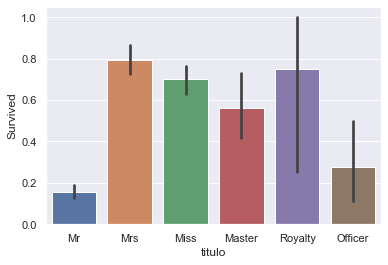

In [28]:
sns.barplot(data=data,x='titulo',y='Survived')

Vamos a analizar la variable SibSp y ver como la gente sobrevive en base a dicha info

<AxesSubplot:xlabel='SibSp', ylabel='count'>

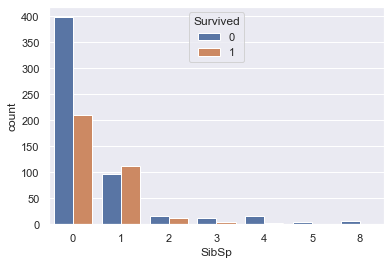

In [29]:
sns.countplot(x = train['SibSp'], hue = train['Survived'])

Podemos observar que cuando la variable SibSp es igual a 1 cambia la tendencia entre sobrevivientes y no sobrevivientes

In [30]:
print("el {} % de las personas tiene 1 familiar a bordo".\
      format(train[train.SibSp == 1].shape[0] / train.shape[0]*100))

el 23.456790123456788 % de las personas tiene 1 familiar a bordo


Trabajo un poco sobre la variable Age

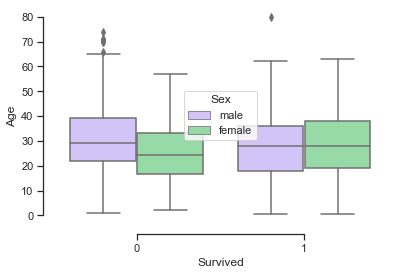

In [31]:
sns.set(style="ticks", palette="pastel")

# Load the example tips dataset

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Survived", y="Age",
            hue="Sex", palette=["m", "g"],
            data=train)
sns.despine(offset=10, trim=True)

Creo tres variables, cuartiles y deciles por edad y genero buckets de a 10 años. Luego genero las curvas de sobrevivientes acumuladas para ver si existe algún salto en los valores

In [32]:
data["cuartilesEdad"] = pd.qcut(data.Age,4, labels=False)
data["decilesEdad"] = pd.qcut(data.Age,10, labels=False)
data["bucketsEdad"] = pd.cut(data.Age, np.array([0,10,20,30,40,50,60,70,80]))

<AxesSubplot:xlabel='bucketsEdad', ylabel='% Sobrevivientes Acumulado'>

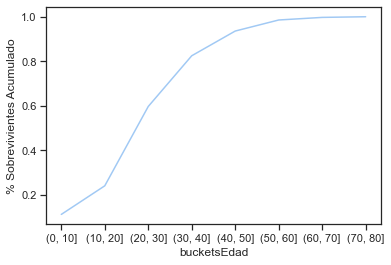

In [33]:
bucketsEdad = data.groupby("bucketsEdad").agg({"Survived":["sum", "count"]}).reset_index()
bucketsEdad.columns =["bucketsEdad", "# Sobrevivientes", "# Totales"]
bucketsEdad["bucketsEdad"] = bucketsEdad.bucketsEdad.astype(str)
totales = bucketsEdad["# Sobrevivientes"].sum()
bucketsEdad["% Sobrevivientes"] = bucketsEdad["# Sobrevivientes"] / totales
bucketsEdad["% Sobrevivientes Acumulado"] = bucketsEdad["% Sobrevivientes"].cumsum()
sns.lineplot(x="bucketsEdad", y="% Sobrevivientes Acumulado", data=bucketsEdad)

<AxesSubplot:xlabel='cuartilesEdad', ylabel='% Sobrevivientes Acumulado'>

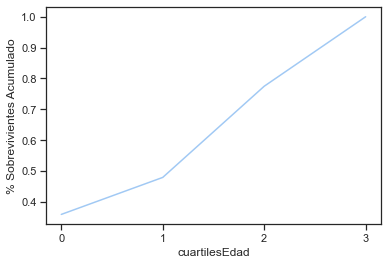

In [34]:
cuartilesEdad = data.groupby("cuartilesEdad").agg({"Survived":["sum", "count"]}).reset_index()
cuartilesEdad.columns =["cuartilesEdad", "# Sobrevivientes", "# Totales"]
cuartilesEdad["cuartilesEdad"] = cuartilesEdad.cuartilesEdad.astype(str)
totales = cuartilesEdad["# Sobrevivientes"].sum()
cuartilesEdad["% Sobrevivientes"] = cuartilesEdad["# Sobrevivientes"] / totales
cuartilesEdad["% Sobrevivientes Acumulado"] = cuartilesEdad["% Sobrevivientes"].cumsum()
sns.lineplot(x="cuartilesEdad", y="% Sobrevivientes Acumulado", data=cuartilesEdad)

<AxesSubplot:xlabel='decilesEdad', ylabel='% Sobrevivientes Acumulado'>

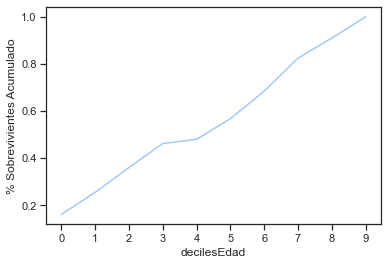

In [35]:
decilesEdad = data.groupby("decilesEdad").agg({"Survived":["sum", "count"]}).reset_index()
decilesEdad.columns =["decilesEdad", "# Sobrevivientes", "# Totales"]
decilesEdad["decilesEdad"] = decilesEdad.decilesEdad.astype(str)
totales = decilesEdad["# Sobrevivientes"].sum()
decilesEdad["% Sobrevivientes"] = decilesEdad["# Sobrevivientes"] / totales
decilesEdad["% Sobrevivientes Acumulado"] = decilesEdad["% Sobrevivientes"].cumsum()
sns.lineplot(x="decilesEdad", y="% Sobrevivientes Acumulado", data=decilesEdad)

A continuación lo que vamos a hacer es crear un gráfico con el porcentaje de cada uno de los deciles de edades y compararlo con la proporción de sobrevivientes en la base total. Con esto vamos a tener alguna idea si existe algún decil que posee mayor proporción de sobrevivientes. (Para esto creamos una nueva base llamada newTrain desde data para que tengamos sólo aquellos que tienen un target definido)

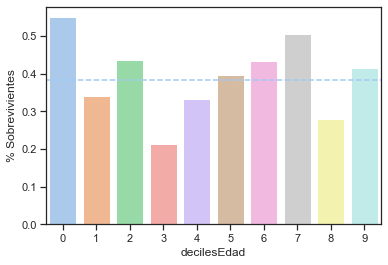

In [36]:
newTrain = data[~data.Survived.isna()]
newTrain["decilesEdad"] = pd.qcut(newTrain.Age,10, labels=False)
decilesEdad = newTrain.groupby("decilesEdad").agg({"Survived":["sum", "count"]}).reset_index()
decilesEdad.columns =["decilesEdad", "# Sobrevivientes", "# Totales"]
totales = decilesEdad["# Sobrevivientes"].sum()
decilesEdad["% Sobrevivientes"] = decilesEdad["# Sobrevivientes"] / decilesEdad["# Totales"] 
decilesEdad["decilesEdad"] = decilesEdad.decilesEdad.astype(str)
pcSurvived = train.Survived.sum() / train.shape[0]
pcSurvived
fig = sns.barplot(x = "decilesEdad", y = "% Sobrevivientes", 
                  data = decilesEdad)
fig.axhline(pcSurvived, ls= "--")

Al mismo gráfico le vamos a incorporar la cantidad de registros que posee cada uno de los deciles para entender si realmente este cambio es significativo con respecto a la base

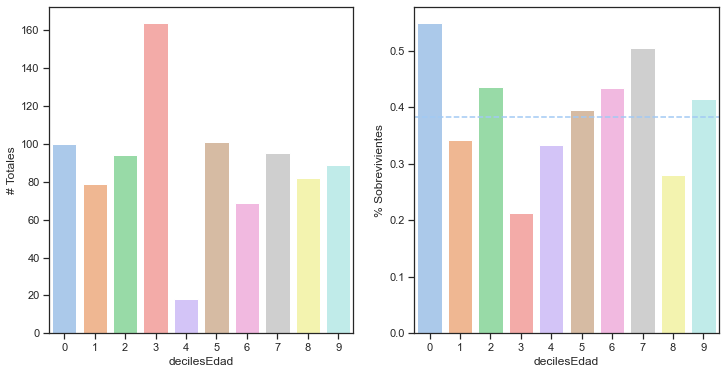

In [37]:
#Seteo matplotlib para que se generen dos subgraficos en uno mismo
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (12,6))
#Seteamos la paleta de colores que va a usar el grafico
sns.set_color_codes("pastel")
#Genero el primer grafico en donde mostrare la cantidad de observaciones por cada decil
s = sns.barplot(ax=ax1, x = "decilesEdad", y = "# Totales", data = decilesEdad)
#Genero el segundo grafico en donde muestro la proporcion de sobrevivientes por decil
s = sns.barplot(ax=ax2, x = "decilesEdad", y = "% Sobrevivientes", data = decilesEdad)
#Seteo la recta de proporcion de target total de la base solo en el segundo grafico
ax2.axhline(pcSurvived, ls="--")

Por ultimo lo que vamos a hacer es crear para todas las variables categorias, variables dummies
(Pclass, Sex, Titulo, decilesEdad) y vamos a eliminar las variables que no vamos a utilizar
(cuartilesEdad, bucketsEdad, Ticket, Name) Estas últimas variables sólo las vamos a eliminar para que quede más limpio la base.

In [38]:
variablesDummies = ["Pclass", "Sex", "titulo", "decilesEdad"]
for variable in variablesDummies:
    data = data.join(pd.get_dummies(data[variable], prefix = variable))
data = data.drop(columns = variablesDummies)
data = data.drop(columns = ["cuartilesEdad", "bucketsEdad", "Ticket", "Name"])
data.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,titulo_Master,titulo_Miss,titulo_Mr,titulo_Mrs,titulo_Officer,titulo_Royalty,decilesEdad_0,decilesEdad_1,decilesEdad_2,decilesEdad_3,decilesEdad_4,decilesEdad_5,decilesEdad_6,decilesEdad_7,decilesEdad_8,decilesEdad_9
0,1,0.0,22.0,1,0,7.2500,S,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2,1.0,38.0,1,0,71.2833,C,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,3,1.0,26.0,0,0,7.9250,S,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,4,1.0,35.0,1,0,53.1000,S,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,5,0.0,35.0,0,0,8.0500,S,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


Para la variable Embarked vamos a utilizar labelEncoder para convertir letras en numeros

In [39]:
le = LabelEncoder()
le.fit(data.Embarked.values)
data = data.join(pd.DataFrame(le.transform(data.Embarked.values), columns=["labelEncoderEmbarked"]))
data = data.drop(columns = ["Embarked"])

In [40]:
#Grabo las bases para seguir con el modelado
newTrain = data[~data.Survived.isna()].to_csv("./data/titanic/02 - preprocesada/train.csv", index = False)
newTest = data[data.Survived.isna()].to_csv("./data/titanic/02 - preprocesada/test.csv", index = False)